Nama : Nurul Baroroh
NIM : A11.2022.14802
DS 02

Mount Drive

In [5]:
from google.colab import drive
drive.mount('/content/drive')

# Ganti path di bawah ini dengan lokasi file CSV kamu di Google Drive
import pandas as pd

file_path = '/content/drive/MyDrive/Data/ObesityDataSet.csv'
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


EDA

In [13]:
# Tampilkan 5 data pertama
print(df.head())

# Info umum
print("\nInformasi dataset:")
print(df.info())

# Deskripsi statistik
print("\nDeskripsi statistik:")
print(df.describe(include='all'))

df.dtypes

    Age  Gender  Height  Weight        CALC FAVC FCVC NCP  SCC SMOKE CH2O  \
0  21.0  Female    1.62    64.0          no   no    2   3   no    no    2   
1  21.0  Female    1.52    56.0   Sometimes   no    3   3  yes   yes    3   
2  23.0    Male    1.80    77.0  Frequently   no    2   3   no    no    2   
3  27.0    Male    1.80    87.0  Frequently   no    3   3   no    no    2   
4  22.0    Male    1.78    89.8   Sometimes   no    2   1   no    no    2   

  family_history_with_overweight FAF TUE       CAEC                 MTRANS  \
0                            yes   0   1  Sometimes  Public_Transportation   
1                            yes   3   0  Sometimes  Public_Transportation   
2                            yes   2   1  Sometimes  Public_Transportation   
3                             no   2   0  Sometimes                Walking   
4                             no   0   0  Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Weight  
1        Normal_We

,0
Age,float64
Gender,object
Height,float64
Weight,float64
CALC,object
FAVC,object
FCVC,object
NCP,object
SCC,object
SMOKE,object


In [7]:
print("\nMissing values per kolom:")
print(df.isnull().sum())

print("\nJumlah nilai unik per kolom:")
print(df.nunique())

print("\nJumlah data duplikat:", df.duplicated().sum())


Missing values per kolom:
Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64

Jumlah nilai unik per kolom:
Age                               1394
Gender                               3
Height                            1562
Weight                            1518
CALC                                 5
FAVC                                 3
FCVC                               808
NCP                         

In [8]:
print("\nDistribusi kelas (target):")
print(df['NObeyesdad'].value_counts())


Distribusi kelas (target):
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


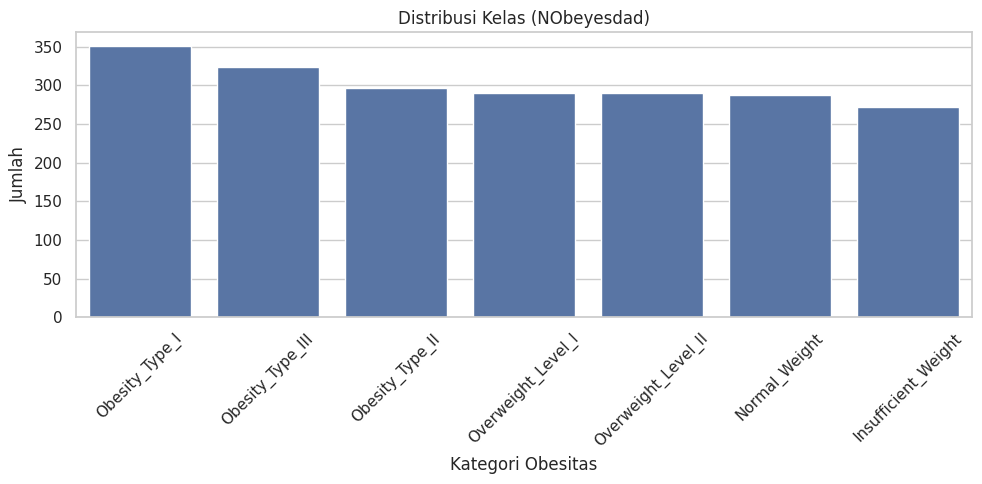

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
# Visualisasi distribusi kelas (kolom target)
plt.figure(figsize=(10, 5))
sns.countplot(x='NObeyesdad', data=df, order=df['NObeyesdad'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribusi Kelas (NObeyesdad)')
plt.xlabel('Kategori Obesitas')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

In [11]:
# Ubah tipe data numerik
cols_to_convert = ['Age', 'Height', 'Weight']
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

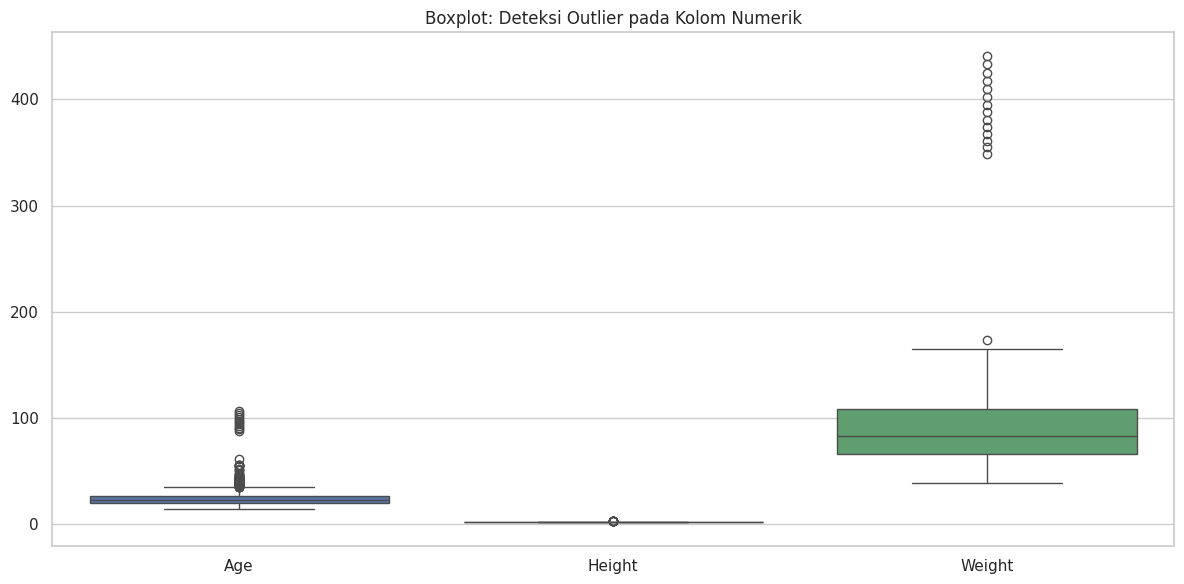

In [12]:
# Boxplot untuk kolom numerik
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Age', 'Height', 'Weight']].dropna())
plt.title("Boxplot: Deteksi Outlier pada Kolom Numerik")
plt.tight_layout()
plt.show()

Kesimpulan EDA:
Dataset memuat informasi demografi, gaya hidup, dan status obesitas.
Terdiri dari 17 kolom dan 498 baris data.

Total Kolom dengan Missing: 16 dari 17 kolom memiliki missing values (kecuali target). Paling banyak: Age (14 dari 498 → ~2.8%), family_history_with_overweight, dan Height. Ini masih tergolong rendah (<5%), sehingga bisa ditangani tanpa menghapus banyak data.

Nilai unik dan tipe data kategori seperti Gender, family_history_with_overweight, dsb., valid dan konsisten.
Terdapat outlier pada kolom Age, Weight, dan Height yang terdeteksi lewat boxplot. Ini bisa memengaruhi hasil analisis dan perlu ditangani.

Kategori obesitas tidak seimbang, beberapa kelas seperti “Insufficient_Weight” dan “Obesity_Type_III” jumlahnya jauh lebih sedikit dibanding kelas lain.